## Data Curation and Analysis Project

The python libraries used in this project are BeautifulSoup, pandas and matplotlib.

In [2]:
# Import libraries

try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

from matplotlib import pyplot as plt

BeautifulSoup and Pandas are already installed and imported


I parse the webpage https://stockanalysis.com/stocks/ which holds information about 5793 US stocks. I use 500 of these and store them as an object using BeautifulSoup.

In [19]:
# Read and parse the webpage on stock market data
my_webpage = requests.get("https://stockanalysis.com/stocks/")

bs_object = BeautifulSoup(my_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage loaded and parsed successfully...


I locate and store the table from the webpage by searching for any "table" tags in its html code. I also gather all column names by searching for any table header tags "th".

In [20]:
# Extract method for table data
table = bs_object.find("table",class_ = "svelte-1jtwn20")
headers = table.find_all("th")

column_names = []
for i in headers:
    title = i.text
    column_names.append(title)

print(column_names)


['Symbol ', 'Company Name ', 'Industry ', 'Market Cap ']


I then transform the table into a data frame using pandas and add all the rows to it by finding all the "tr" and "td" tags in the table.

In [21]:
# Transform Method to convert data into a reliable data frame
df = pandas.DataFrame(columns=column_names)

rows = table.find_all("tr")

for i in rows[1:]:
    data = i.find_all("td")
    row = [tr.text.strip() for tr in data]
    l = len(df)
    df.loc[l] = row

print(df)
    

    Symbol                        Company Name   \
0         A          Agilent Technologies, Inc.   
1        AA                   Alcoa Corporation   
2       AAC        Ares Acquisition Corporation   
3      AACG               ATA Creativity Global   
4      AACI          Armada Acquisition Corp. I   
..      ...                                 ...   
495    ATLX           Atlas Lithium Corporation   
496    ATMC          AlphaTime Acquisition Corp   
497    ATMU  Atmus Filtration Technologies Inc.   
498    ATMV          AlphaVest Acquisition Corp   
499    ATNF             180 Life Sciences Corp.   

                          Industry  Market Cap   
0            Diagnostics & Research      33.17B  
1                          Aluminum       5.00B  
2                   Shell Companies     760.41M  
3     Education & Training Services      34.74M  
4                   Shell Companies      86.14M  
..                              ...         ...  
495  Other Precious Metals & Mining  

I then clean the data by dropping any duplicate rows or null values.

In [22]:
# Delete duplicate rows
df = df.drop_duplicates()

# Drop null values
df = df.dropna()


Finally, I convert my data frame to a csv file.

In [70]:
# Save as csv file / Load method
df.to_csv("stock_market_data.csv")

The bar chart provides a visualization of the market cap of the top five companies in the dataset. It’s striking to observe that Apple, represented by the ticker symbol AAPL, dominates the chart with the highest market cap. What’s particularly surprising is the significant lead Apple has over Amazon (AMZN) - its market cap is nearly twice as large.

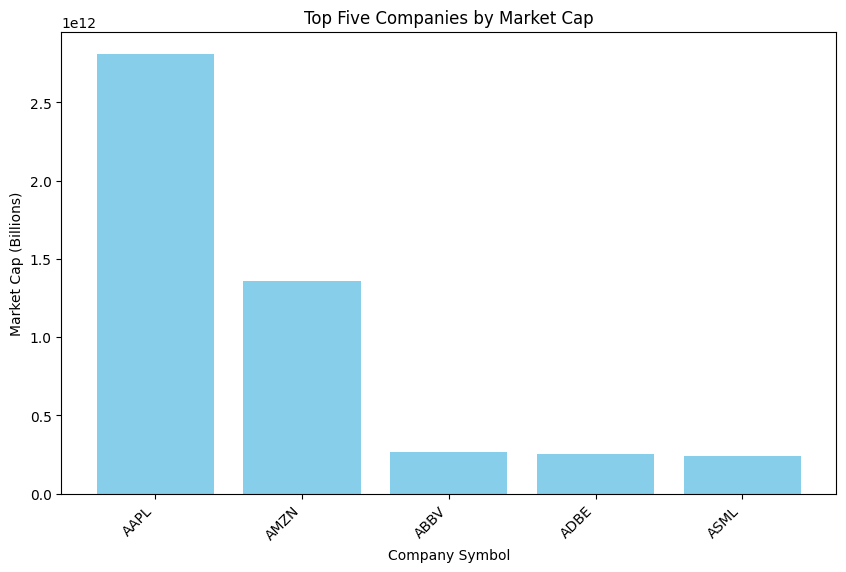

In [25]:
# Data Visualization
def convert_market_cap(value):
    value = value.replace(',', '')
    if 'B' in value:
        return float(value.replace('B', '')) * 1e9
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6

df1 = df.copy()
df1['Market Cap '] = df1['Market Cap '].apply(convert_market_cap)

top_five = df1.sort_values('Market Cap ', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_five['Symbol '], top_five['Market Cap '], color='skyblue')
plt.xlabel("Company Symbol")
plt.ylabel("Market Cap (Billions)")
plt.title("Top Five Companies by Market Cap")
plt.xticks(rotation=45, ha='right')
plt.show()


I use the describe method on the Market Cap column to get an idea on its numerical statistics. The mean is $15.9 billion and the median is $434 million which shows that the mean is significantly skewed by upper outliers like Apple and Amazon - their large market cap values drive the mean up. So the average market cap value of a company in my data set is ~ 434 million USD.

In [28]:
# Descriptive Statistics
df1["Market Cap "].describe()

count    5.000000e+02
mean     1.592406e+10
std      1.417913e+11
min      1.200000e+06
25%      7.799750e+07
50%      4.339150e+08
75%      3.062500e+09
max      2.811030e+12
Name: Market Cap , dtype: float64